In [11]:
#We get all dependencis we need for a Random Forest
#If you need a module do: "!pip install [module_name]""
import numpy as np
import pandas as pd
import secrets
import matplotlib.pylab as plt
import itertools
import pydot
import pickle
import sys

from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine
from collections import Counter
from subprocess import call
from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz

In [12]:
# Get the URL of the video we want to create highlights on
url = "https://www.youtube.com/watch?v=xqtZf2dIZzQ"
vidId = url.replace('https://www.youtube.com/watch?v=', '')

In [13]:
# Get the data extracted from our video
db_conn_str = "mysql+pymysql://{:}:{:}@{:}/{:}".format(secrets.user, secrets.password, secrets.host, secrets.db)
db_conn = create_engine(db_conn_str)
df = pd.read_sql('SELECT * FROM clips WHERE url ="'+ url +'"', con=db_conn)

print('Number of Rows:', len(df.index))
db_conn.dispose()

OperationalError: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on 'climactic-test3.cmikkru8vljn.us-east-1.rds.amazonaws.com' ([Errno 11001] getaddrinfo failed)")
(Background on this error at: http://sqlalche.me/e/e3q8)

In [ ]:
features_df = df[['pitch', 'amplitude', 'subjectivity', 'polarity', 'pred_excitement']]

In [ ]:
# Separate our tags and features
X = features_df
X.head()

In [ ]:
#Get models from files
rf_model = pickle.load(open('highlight-model/rf_100t_new.sav', 'rb'))
nn_model = pickle.load(open('datastore/models/highlight-models/nn_2layers_0.5.sav', 'rb'))

In [7]:
# Get model predictions
rf_predictions = df['pred_highlight_rf'].tolist()
nn_predictions = df['pred_highlight_nn'].tolist()
print(rf_predictions.count(1))
print(nn_predictions.count(1))

10
63


In [8]:
rf_predictions = rf_model.predict(X)
nn_predictions = nn_model.predict_classes(X)
j = 0
for i in nn_predictions:
    if i == 1: j += 1
rf_predictions = rf_predictions.tolist()
nn_predictions = nn_predictions.tolist()
print(rf_predictions.count(1))
print(j)

df['pred_highlight_rf_2'] = rf_predictions
df['pred_highlight_nn_2'] = nn_predictions

104
63


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


In [9]:
# get youtube embeded url
def formatYoutubeUrl(url, start, end):
  embed_url = url.replace("watch?v=", "embed/")
  params = "?start={:}&end={:}&autoplay=1".format(start, end)
  return embed_url + params

def printUrls(df):
    for idx, row in df.iterrows():
        print(formatYoutubeUrl(row['url'], row['start'], row['end']))

In [10]:
# all non-highlight clips
non_highlight_rf = df[df['pred_highlight_rf_2'] == 0]
non_highlight_nn = df[df['pred_highlight_nn_2'] == 0]

# all non-highlight clips
highlight_rf = df[df['pred_highlight_rf_2'] == 1]
highlight_nn = df[df['pred_highlight_nn_2'] == 1]

# print URLs
print('=== NON-HIGHLIGHT RF ===')
printUrls(non_highlight_rf.sample(20))

print('=== HIGHLIGHT RF ===')
printUrls(highlight_rf)

print('=== NON-HIGHLIGHT NN ===')
printUrls(non_highlight_nn.sample(20))

print('=== HIGHLIGHT NN ===')
printUrls(highlight_nn)

=== NON-HIGHLIGHT RF ===
https://www.youtube.com/embed/BviHqDGezQw?start=1830&end=1834&autoplay=1
https://www.youtube.com/embed/BviHqDGezQw?start=718&end=722&autoplay=1
https://www.youtube.com/embed/BviHqDGezQw?start=1016&end=1020&autoplay=1
https://www.youtube.com/embed/BviHqDGezQw?start=1692&end=1696&autoplay=1
https://www.youtube.com/embed/BviHqDGezQw?start=852&end=856&autoplay=1
https://www.youtube.com/embed/BviHqDGezQw?start=1610&end=1614&autoplay=1
https://www.youtube.com/embed/BviHqDGezQw?start=836&end=840&autoplay=1
https://www.youtube.com/embed/BviHqDGezQw?start=324&end=328&autoplay=1
https://www.youtube.com/embed/BviHqDGezQw?start=2082&end=2086&autoplay=1
https://www.youtube.com/embed/BviHqDGezQw?start=1120&end=1124&autoplay=1
https://www.youtube.com/embed/BviHqDGezQw?start=744&end=748&autoplay=1
https://www.youtube.com/embed/BviHqDGezQw?start=1374&end=1378&autoplay=1
https://www.youtube.com/embed/BviHqDGezQw?start=1086&end=1090&autoplay=1
https://www.youtube.com/embed/BviHqD

ValueError: 'a' must be greater than 0 unless no samples are taken

In [11]:
# Output Predictions vs Actual results
for idx, row in df.iterrows():
    print(formatYoutubeUrl(row['url'], row['start'], row['end']), "Predicted RF: " ,row['pred_highlight_rf'], "Predicted NN: " ,row['pred_highlight_nn'])

https://www.youtube.com/embed/BviHqDGezQw?start=0&end=4&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=2&end=6&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=4&end=8&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=6&end=10&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=8&end=12&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=10&end=14&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=12&end=16&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=14&end=18&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=16&end=20&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=18&end=22&autoplay=1 Predicted RF

https://www.youtube.com/embed/BviHqDGezQw?start=638&end=642&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=640&end=644&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=642&end=646&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=644&end=648&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=646&end=650&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=648&end=652&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=650&end=654&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=652&end=656&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=654&end=658&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=656&end

https://www.youtube.com/embed/BviHqDGezQw?start=1136&end=1140&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=1138&end=1142&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=1140&end=1144&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=1142&end=1146&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=1144&end=1148&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=1146&end=1150&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=1148&end=1152&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=1150&end=1154&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=1152&end=1156&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDG

https://www.youtube.com/embed/BviHqDGezQw?start=1596&end=1600&autoplay=1 Predicted RF:  0 Predicted NN:  1
https://www.youtube.com/embed/BviHqDGezQw?start=1598&end=1602&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=1600&end=1604&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=1602&end=1606&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=1604&end=1608&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=1606&end=1610&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=1608&end=1612&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=1610&end=1614&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=1612&end=1616&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDG

https://www.youtube.com/embed/BviHqDGezQw?start=2016&end=2020&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=2018&end=2022&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=2020&end=2024&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=2022&end=2026&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=2024&end=2028&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=2026&end=2030&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=2028&end=2032&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=2030&end=2034&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=2032&end=2036&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDG

https://www.youtube.com/embed/BviHqDGezQw?start=2462&end=2466&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=2464&end=2468&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=2466&end=2470&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=2468&end=2472&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=2470&end=2474&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=2472&end=2476&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=2474&end=2478&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=2476&end=2480&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDGezQw?start=2478&end=2482&autoplay=1 Predicted RF:  0 Predicted NN:  0
https://www.youtube.com/embed/BviHqDG

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def secondsToTime(secs):
    m, s = divmod(secs, 60)
    return "{:}:{:}".format(m, s)

def realTimeHypeGraph(df):
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)
    plt.ion()

    fig.show()
    fig.canvas.draw()

    x = []
    y1 = []
    y2 = []

    for idx, row in dataset.iterrows():
        ax.clear()
        ax.set_ylim([-0.5, 2.5])
        
        videoTime = row['start'] / 60
        x.append(videoTime)
        y1.append(row['pred_highlight_rf'])
        y2.append(row['pred_highlight_nn'] + 0.02)

        ax.plot(x[-20:], y1[-20:], label='random_forest', alpha=0.7)
        ax.plot(x[-20:], y2[-20:], label='neural_network', alpha=0.7)
        
        plt.xlabel('Time (s)')
        plt.ylabel('Highlight')
        plt.legend()
        
        fig.canvas.draw()
        time.sleep(2)

In [13]:
from IPython.display import HTML

youtubeEmbedUrl = url.replace('watch?v=', 'embed/')
# Youtube
HTML("<iframe width='560' height='315' src='{:}'</iframe>".format(youtubeEmbedUrl))

C:\Users\eldri\Anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


<IPython.core.display.Javascript object>


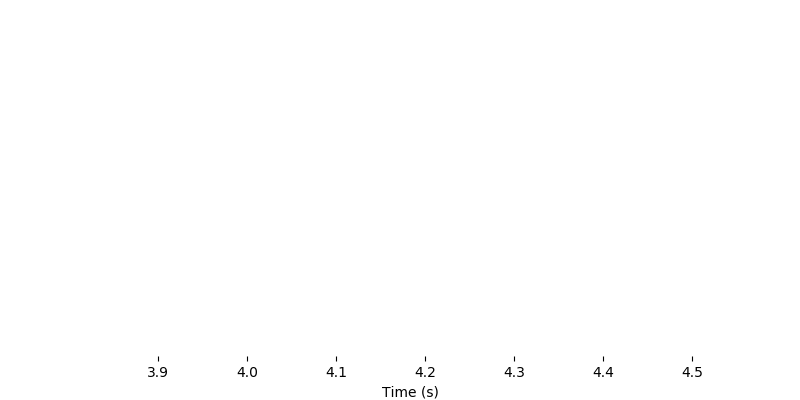

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\eldri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-1af8571a215a>", line 3, in <module>
    realTimeHypeGraph(dataset)
  File "<ipython-input-12-dd868378fff7>", line 38, in realTimeHypeGraph
    fig.canvas.draw()
  File "C:\Users\eldri\Anaconda3\lib\site-packages\matplotlib\backends\backend_webagg_core.py", line 150, in draw
    super().draw()
  File "C:\Users\eldri\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 402, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\eldri\Anaconda3\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer, *args, **kwargs)
  File "C:\Users\eldri\Anaconda3\lib\site-packages\matplotlib\figure.py", line 1649, in draw
    renderer, self, artists, self.suppressComposite)
  File "C:\Users\eldri\Anaconda3\lib\site-pa

KeyboardInterrupt: 

In [14]:
# run this cell right before you click play on the youtube video
dataset = df[df['start'] >= 0] # you can customize the start time here
realTimeHypeGraph(dataset)

In [ ]:
# Display a community-made highlight reel based on video
community_url = "https://www.youtube.com/watch?v=TYxE7DHRld8"

youtubeEmbedUrl = community_url.replace('watch?v=', 'embed/')
# Youtube
HTML("<iframe width='560' height='315' src='{:}'</iframe>".format(youtubeEmbedUrl))

In [ ]:
# Display our highlight reel based on video
from IPython.display import Video

embedVideo = Video("datastore/videos/"+vidId+".mp4")

HTML("<iframe width='560' height='315' src='{:}'</iframe>".format(embedVideo))